In [25]:
import pandas as pd

dataset = pd.read_csv("RKI_COVID19.csv", usecols=["Bundesland","Geschlecht", "AnzahlFall", "Meldedatum", "AnzahlTodesfall" ], parse_dates=["Meldedatum"])
dataset

,Bundesland,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum
0,Schleswig-Holstein,M,1,0,2020-09-30 00:00:00+00:00
1,Schleswig-Holstein,M,1,0,2020-10-29 00:00:00+00:00
2,Schleswig-Holstein,M,1,0,2020-11-03 00:00:00+00:00
3,Schleswig-Holstein,M,1,0,2020-11-20 00:00:00+00:00
4,Schleswig-Holstein,M,1,0,2020-11-23 00:00:00+00:00
...,...,...,...,...,...
1652690,Thüringen,W,3,0,2021-04-07 00:00:00+00:00
1652691,Thüringen,W,7,0,2021-04-08 00:00:00+00:00
1652692,Thüringen,W,5,0,2021-04-09 00:00:00+00:00
1652693,Thüringen,W,1,0,2021-04-11 00:00:00+00:00


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652695 entries, 0 to 1652694
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Bundesland  1652695 non-null  object             
 1   Geschlecht  1652695 non-null  object             
 2   AnzahlFall  1652695 non-null  int64              
 3   Meldedatum  1652695 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 50.4+ MB


In [8]:
#data cleaning
#dataset.dropna(inplace=True)
#Descriptive analysis
dataset.describe()

,AnzahlFall
count,1.652695e+06
mean,1.841631e+00
std,2.647663e+00
min,-3.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.450000e+02


In [15]:
dfman = dataset[dataset.Geschlecht == "M"]
dfman

,Bundesland,Geschlecht,AnzahlFall,Meldedatum
0,Schleswig-Holstein,M,1,2020-09-30 00:00:00+00:00
1,Schleswig-Holstein,M,1,2020-10-29 00:00:00+00:00
2,Schleswig-Holstein,M,1,2020-11-03 00:00:00+00:00
3,Schleswig-Holstein,M,1,2020-11-20 00:00:00+00:00
4,Schleswig-Holstein,M,1,2020-11-23 00:00:00+00:00
...,...,...,...,...
1652301,Thüringen,M,3,2021-04-09 00:00:00+00:00
1652302,Thüringen,M,2,2021-04-10 00:00:00+00:00
1652303,Thüringen,M,1,2021-04-11 00:00:00+00:00
1652304,Thüringen,M,1,2021-04-12 00:00:00+00:00


In [16]:
dfman.dropna()

,Bundesland,Geschlecht,AnzahlFall,Meldedatum
0,Schleswig-Holstein,M,1,2020-09-30 00:00:00+00:00
1,Schleswig-Holstein,M,1,2020-10-29 00:00:00+00:00
2,Schleswig-Holstein,M,1,2020-11-03 00:00:00+00:00
3,Schleswig-Holstein,M,1,2020-11-20 00:00:00+00:00
4,Schleswig-Holstein,M,1,2020-11-23 00:00:00+00:00
...,...,...,...,...
1652301,Thüringen,M,3,2021-04-09 00:00:00+00:00
1652302,Thüringen,M,2,2021-04-10 00:00:00+00:00
1652303,Thüringen,M,1,2021-04-11 00:00:00+00:00
1652304,Thüringen,M,1,2021-04-12 00:00:00+00:00


In [18]:
dfman.groupby("Bundesland").sum()

,AnzahlFall
Bundesland,
Baden-Württemberg,190406
Bayern,260586
Berlin,73216
Brandenburg,41946
Bremen,11224
Hamburg,32129
Hessen,114838
Mecklenburg-Vorpommern,15775
Niedersachsen,103151


<AxesSubplot:xlabel='Bundesland'>

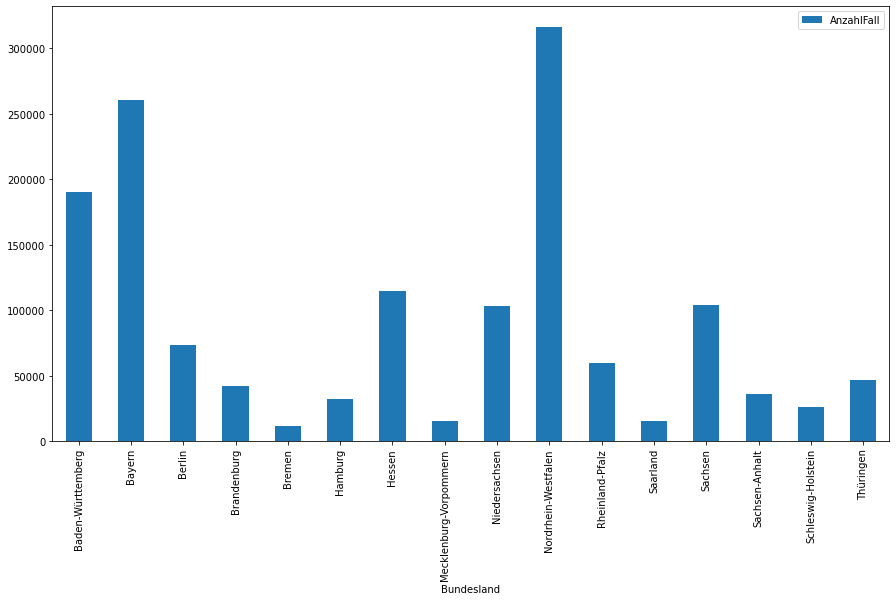

In [20]:
dfman.groupby("Bundesland").sum().plot.bar(figsize=(15,8))

In [23]:
ds= pd.pivot_table(dataset, values="AnzahlFall", index=["Bundesland"], columns=["Geschlecht"])
ds

Geschlecht,M,W,unbekannt
Bundesland,,,
Baden-Württemberg,1.701649,1.729453,1.423330
Bayern,1.800361,1.792505,1.277367
Berlin,1.867755,1.927240,1.303619
Brandenburg,1.481929,1.607034,1.074380
Bremen,2.211626,2.182413,1.200000
Hamburg,2.889039,3.021336,1.121780
Hessen,1.851748,1.892191,1.245592
Mecklenburg-Vorpommern,1.485405,1.572361,1.345324
Niedersachsen,1.647543,1.657284,1.188708


<AxesSubplot:xlabel='Bundesland'>

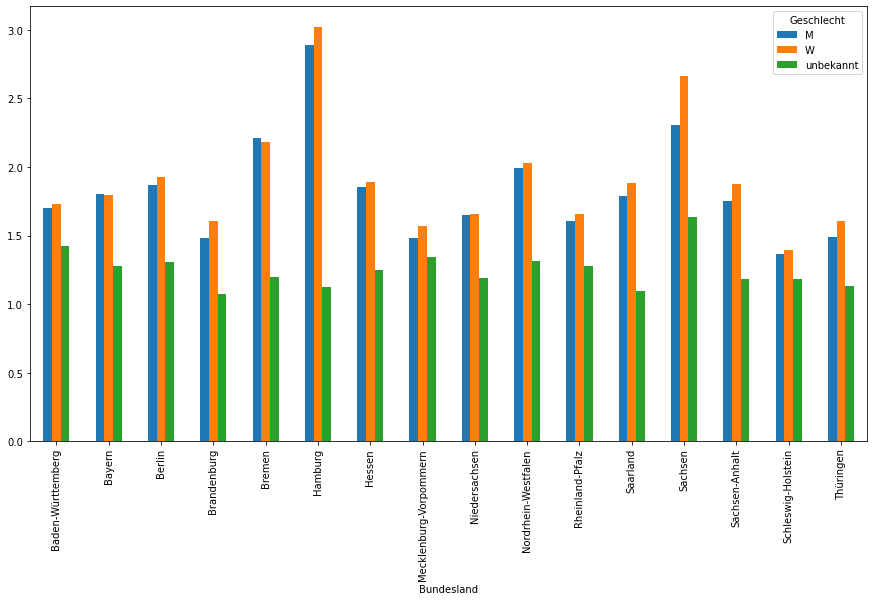

In [24]:
ds.plot.bar(figsize=(15,8))

In [26]:
dt= pd.pivot_table(dataset, values="AnzahlTodesfall", index=["Bundesland"], columns=["Geschlecht"])
dt

Geschlecht,M,W,unbekannt
Bundesland,,,
Baden-Württemberg,0.041995,0.036888,0.000941
Bayern,0.047312,0.044497,0.015279
Berlin,0.042219,0.035132,0.015416
Brandenburg,0.063275,0.050156,0.000000
Bremen,0.045517,0.037714,0.000000
Hamburg,0.069328,0.058516,0.000000
Hessen,0.054244,0.049735,0.007557
Mecklenburg-Vorpommern,0.045669,0.036519,0.000000
Niedersachsen,0.041512,0.037541,0.007734


<AxesSubplot:xlabel='Bundesland'>

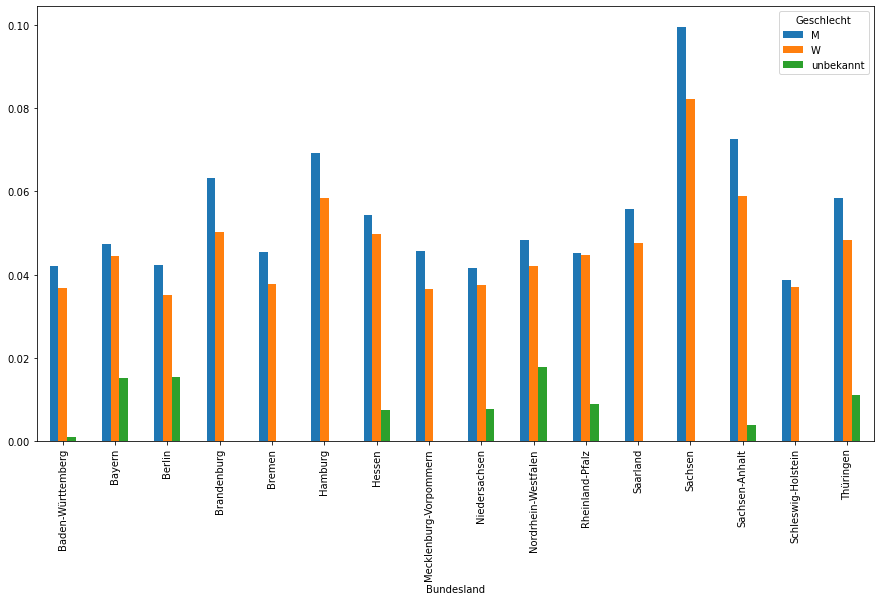

In [27]:
dt.plot.bar(figsize=(15,8))

In [30]:
dataset.dtypes

Bundesland                      object
Geschlecht                      object
AnzahlFall                       int64
AnzahlTodesfall                  int64
Meldedatum         datetime64[ns, UTC]
dtype: object

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652695 entries, 0 to 1652694
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   Bundesland       1652695 non-null  object             
 1   Geschlecht       1652695 non-null  object             
 2   AnzahlFall       1652695 non-null  int64              
 3   AnzahlTodesfall  1652695 non-null  int64              
 4   Meldedatum       1652695 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 63.0+ MB


<AxesSubplot:>

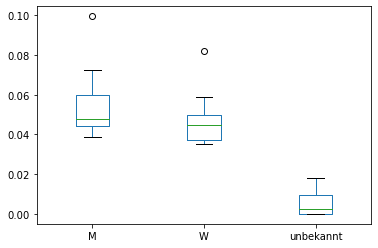

In [32]:
dt.plot.box()